# 머신 러닝 모델 평가

3장에서 본 3개의 예제에서 데이터를 훈련세트, 검증 세트, 테스트 세트로 나누었습니다. 훈련에 사용된 동일한 데이터로 모델을 평가하지 않는 이유는 금방 드러났습니다. 몇 번의 에포크 후에 3개의 모델이 모두 과대적합 되기 시작했습니다. 즉 훈련 데이터의 성능에 비해 처음 본 데이터에 대한 성능이 좋아지지 않았습니다(또는 더 나빠집니다). 반면 훈련데이터의 성능은 훈련이 진행될수록 항상 증가됩니다.


머신러닝의 목표는 청므 본 데이터에서 잘 작동하는 일반화된 모델을 얻는 것입니다. 여기에서 과대적합은 주요 장애물입니다. 관측할 수 있는 것만 제어할 수 있으므로 모델의 일반화 성능에 대한 신뢰할 수 있는 측정 방법이 아주 중요합니다. 다음 절에서 과대적합을 완화하고 일반화를 최대화하기 위한 전략을 살펴보겠습니다. 이 절에서는 일반화, 즉 머신 러닝 모델의 성능을 어떻게 측정하는지에 집중합니다.

## 훈련, 검증, 테스트 세트
모델 평가의 핵심은 가용한 데이터를 항상 훈련, 검증, 테스트 3개의 세트로 나누는 것입니다. 훈련 세트에서 모델을 훈련하고 검증 세트에서 모델을 평가합니다. 모델을 출시할 준비가 되면 테스트 세트에서 최종적으로 딱 한 번 모델을 테스트합니다.

훈련 세트와 테스트 세트 2개를 사용하면 어떨까요? 훈련 세트에서 훈련하고 테스트 세트에서 평가하는 것이죠. 훨씬 간단하네요!

이렇게 하지 않는 이유는 모델을 개발할 때 항상 모델의 설정을 튜닝하기 때문입니다. 예를 들어 층의 수나 층의 유닛 수를 선택합니다.(이런 파라미터를 네트워크의 가중치와 구분하기 위해 하이퍼파라미터라고 부릅니다). 검증 세트에서 모델의 성능을 평가하여 이런 튜닝을 수행합니다. 본질적으로 이런 튜닝도 어떤 파라미터 공간에서 좋은 설정을 찾는 학습입니다. 결국 검증 세트의 성능을 기반으로 모델의 설정을 튜닝하면 검증 세트로 모델을 직접 훈련하지 않더라도 빠르게 검증 세트에 과대적합될 수 있습니다.

이 현상의 핵심은 정보누설(information leak) 개념에 있습니다. 검증 세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조장할 때마다 검증 데이터에 관한 정보가 모델로 새는 것입니다.하나의 파라미터에 대해서 단 한 번만 튜닝한다면 아주 적은 정보가 누설됩니다. 이런 검증 세트로는 모델을 평가할 만합니다. 하지만 한 번 튜닝하고 나서 검증 세트에 평가한 결과를 가지고 다시 모델을 조정하는 과정을 여러 번 반복하면, 검증 세트에 관한 정보를 모델에 아주 많이 노출시키게 됩니다.

결국 검증 데이터에 맞추어 최적화했기 때문에 검증 데이터에 의도적으로 잘 수행되는 모델이 만들어 집니다. 검증 데이터가 아니고 완전히 새로운 데이터에 대한 성능이 관심 대상이라면 모델을 평가하기 위해 이전에 본 적 없는 완전히 다른 데이터셋을 사용해야 합니다. 바로 테스트 세트입니다. 모델은 간접적으로라도 테스트 세트에 대한 어떤 정보도 얻어서는 안 됩니다. 테스트 세트 성능에 기초하여 튜닝한 모델의 모든 설정은 일반화 성능을 왜곡시킬 것입니다.

데이터를 훈련, 검증, 테스트 세트로 나누는 것은 간단해 보일 수 있지만 데이터가 적을 때는 몇가지 고급 기법을 사용하면 도움이 됩니다. 대표적인 세 가지 평가 방법인 단순 홀드아웃 검증, K-겹 교차 검증, 셔플링을 사용한 반복 K-겹 교차 검증을 살펴보겠습니다.

## 단순 홀드아웃 검증
데이터의 일정량을 테스트 세트로 떼어 놓습니다. 남은 데이터에서 훈련하고 테스트 세트로 평가합니다. 앞 절에서 설명했듯이 정보 누설을 막기 위해 테스트 세트를 사용하여 모델을 튜닝해서는 안 됩니다 이런 이유로 검증 세트도 따로 떼어 놓아야 합니다.

그림으로 나타내면 홀드아웃 검증은 아래 그림과 같습니다. 다음 코드는 간단한 구현 예입니다.


단순 홀드아웃 검증 분할
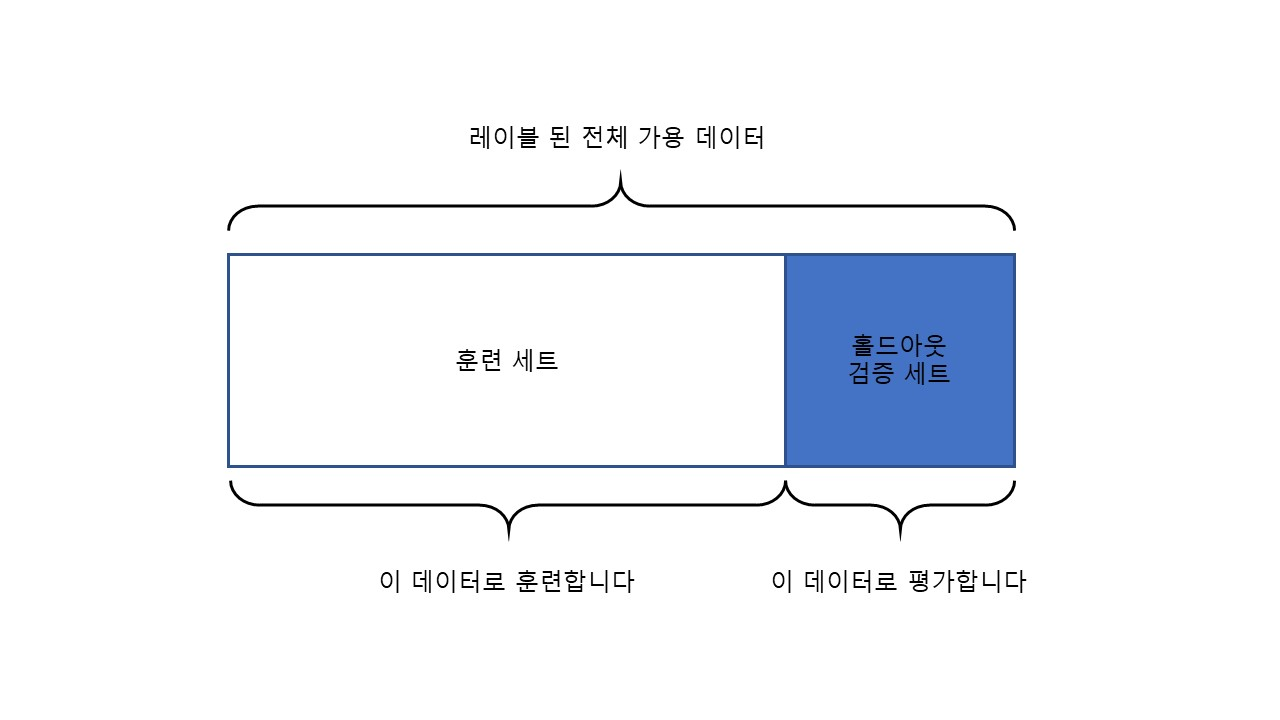

In [ ]:
#홀드아웃 검증 구현 예
import numpy as np

num_validation_samples = 10000

np.random.shuffle(data)     #데이터를 섞는 것(셔플링)이 일반적으로 좋습니다.

validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data[:]   #훈련 세트를 만듭니다.

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)     #훈련 세트에서 모델을 훈련하고 검증세트로 평가합니다.

#여기에서 모델을 튜닝하고,
#다시 훈련하고, 평가하고, 또 다시 튜닝하고...

model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))      #하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련 시킵니다.
test_score = model.evaluate(test_data)

#데이터를 넣지 않았기 때문에 안되는 것이 정상! 이건 그냥 예시 입니다.

NameError: ignored

이 평가 방법은 단순해서 한 가지 단점이 있습니다. 데이터가 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있습니다. 쉽게 이를 확인할 수 있습니다. 다른 난수 초깃값으로 셔플링해서 데이터를 나누었을 때 모델의 성능이 매우 달라지면 바로 이 문제입니다. 다음에 이야기할 K-겹 교차 검증과 반복 K-겹 교차 검증이 이 문제를 해결할 수 있습니다.

## K-겹 교차 검증
이 방식에서는 데이터를 동일한 크기를 가진 K개 분할로 나눕니다. 각 분할 i에 대해 남은 K-1개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가합니다. 최종 점수는 이렇게 얻은 K개의 점수를 평균합니다. 이 방법은 모델의 성능이 데이터 분할에 따라 편차가 클 때 도움이 됩니다. 홀드아웃 검증처럼 이 방법은 모델의 튜닝에 별개의 검증 세트를 사용하게 됩니다.

그림으로 나타내면 K-겹 교차검증은 아래와 같습니다.


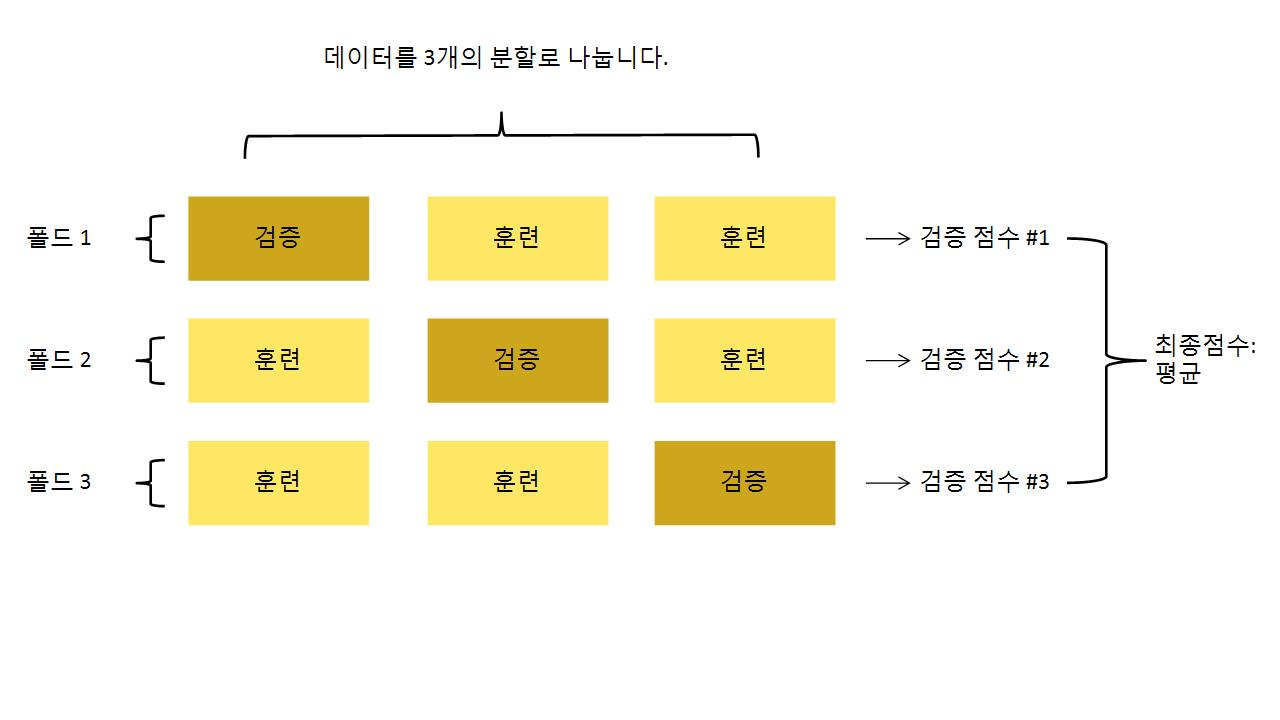

In [ ]:
#K-겹 교차 검증 구현 예

k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples * fold: num_validation_samples * (fold+1)]
  training_data = data[:num_validation_samples*fold] + data[num_validation_samples * (fold+1):]

  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.append(validation_score)

validation_score = np.average(validation_scores)

model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

NameError: ignored

## 셔플링을 사용한 반복 K-겹 교차 검증
이 방법은 비교적 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용합니다. 캐글 경연에서는 이 방법이 아주 크게 도움이 됩니다. 이 방법은 K-겹 교차 검증을 여러번 적용하되 K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞습니다. 최종 점수는 모든 K-겹 교차 검증을 실행해서 얻은 점수의 평균이 됩니다. 결국 P * K개(P는 반복 횟수)의 모델을 훈련하고 평가하므로 비용이 매우 많이 듭니다.